In [4]:
import netCDF4 as nc
import pandas as pd
import numpy as np
import xarray as xr
import xesmf as xe
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import os

In [2]:
ds = xr.open_dataset(r"/home/uditbhatia/Documents/Sarth/Downscaling_AugmentedConvLSTM/02_Raw_Data/SRTM/elevation_India_Regridded_Masked.nc")
ds

<xarray.Dataset>
Dimensions:  (lat: 302, lon: 292)
Coordinates:
  * lat      (lat) float64 6.85 6.95 7.05 7.15 7.25 ... 36.65 36.75 36.85 36.95
  * lon      (lon) float64 68.25 68.35 68.45 68.55 ... 97.05 97.15 97.25 97.35
Data variables:
    Band1    (lat, lon) float32 ...
    crs      |S1 ...
Attributes:
    Conventions:  CF-1.5
    GDAL:         GDAL 3.4.0, released 2021/11/04
    history:      Fri May 20 16:48:44 2022: GDAL Create( E:\DATA\REPO\Downsca...

In [3]:
dr = ds['Band1']
dr

<xarray.DataArray 'Band1' (lat: 302, lon: 292)>
array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)
Coordinates:
  * lat      (lat) float64 6.85 6.95 7.05 7.15 7.25 ... 36.65 36.75 36.85 36.95
  * lon      (lon) float64 68.25 68.35 68.45 68.55 ... 97.05 97.15 97.25 97.35
Attributes:
    long_name:     GDAL Band Number 1
    grid_mapping:  crs

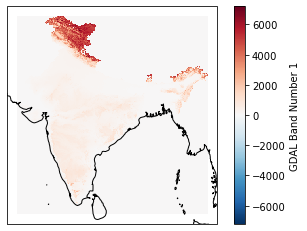

In [5]:
ax = plt.axes(projection=ccrs.PlateCarree())
dr.plot.pcolormesh(ax=ax)
ax.coastlines()

In [7]:
lat_bnds, lon_bnds = [6.5, 38.5], [66.5, 100]
projection_dimension = [129, 135]
lat_lst = np.linspace(lat_bnds[0], lat_bnds[1], projection_dimension[0])
lon_lst = np.linspace(lon_bnds[0], lon_bnds[1], projection_dimension[1])

In [8]:
ds_out = xr.Dataset(
    {
        "lat": (["lat"], lat_lst),
        "lon": (["lon"], lon_lst),
    }
)
ds_out

<xarray.Dataset>
Dimensions:  (lat: 129, lon: 135)
Coordinates:
  * lat      (lat) float64 6.5 6.75 7.0 7.25 7.5 ... 37.5 37.75 38.0 38.25 38.5
  * lon      (lon) float64 66.5 66.75 67.0 67.25 67.5 ... 99.25 99.5 99.75 100.0
Data variables:
    *empty*

In [9]:
regridder = xe.Regridder(ds, ds_out, "bilinear")
regridder  # print basic regridder information.

xESMF Regridder 
Regridding algorithm:       bilinear 
Weight filename:            bilinear_302x292_129x135.nc 
Reuse pre-computed weights? False 
Input grid shape:           (302, 292) 
Output grid shape:          (129, 135) 
Periodic in longitude?      False

In [25]:
dr_out = regridder(dr)
dr_out

<xarray.DataArray (lat: 129, lon: 135)>
array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)
Coordinates:
  * lon      (lon) float64 66.5 66.75 67.0 67.25 67.5 ... 99.25 99.5 99.75 100.0
  * lat      (lat) float64 6.5 6.75 7.0 7.25 7.5 ... 37.5 37.75 38.0 38.25 38.5
Attributes:
    regrid_method:  bilinear

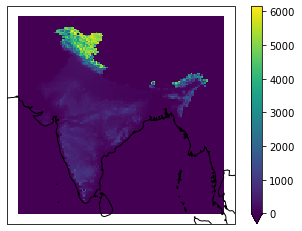

In [26]:
ax = plt.axes(projection=ccrs.PlateCarree())
dr_out.plot.pcolormesh(ax=ax, vmin = 0)
ax.coastlines()

In [27]:
dr_np = dr_out.to_numpy()
dr_np.shape

(129, 135)

In [30]:
dr_np[dr_np<0] = 0
# sum(dr_np.flatten() < 0)

0.0 6146.6978


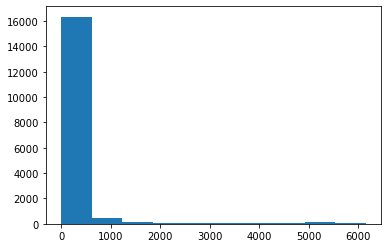

In [31]:
plt.hist(dr_np.flatten())
print(min(dr_np.flatten()), max(dr_np.flatten()))

In [32]:
np.save(
    r"/home/uditbhatia/Documents/Sarth/Downscaling_AugmentedConvLSTM/03_Preprocess_Data/npy_Files/SRTM.npy", 
    dr_np
    )